In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


ターゲットコラム（予想するやつ）は何か調べる。

In [2]:
pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [3]:
pd.read_fwf("../input/house-prices-advanced-regression-techniques/data_description.txt")

,MSSubClass: Identifies the type of dwelling involved in the sale.,Unnamed: 1
0,20\t1-STORY 1946 & NEWER ALL STYLES,NaN
1,30\t1-STORY 1945 & OLDER,NaN
2,40\t1-STORY W/FINISHED ATTIC ALL AGES,NaN
3,45\t1-1/2 STORY - UNFINISHED ALL AGES,NaN
4,50\t1-1/2 STORY FINISHED ALL AGES,NaN
...,...,...
393,"Abnorml\tAbnormal Sale - trade, foreclosure, ...",NaN
394,AdjLand\tAdjoining Land Purchase,NaN
395,Alloca\tAllocation - two linked properties wit...,", typica"
396,Family\tSale between family members,NaN


In [4]:
df= pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


ここまではテンプレかも
グラフ見てみる

In [7]:
y=df["SalePrice"].values

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

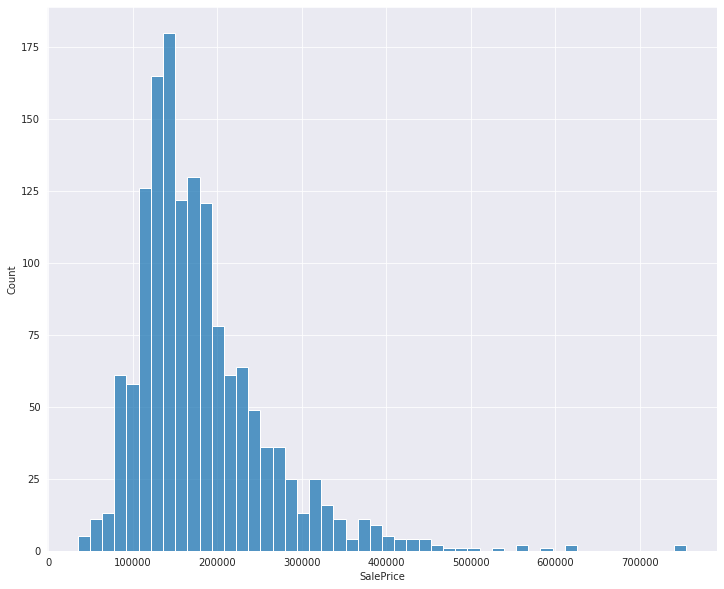

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data=df, x="SalePrice", bins=50,cbar=True)

<AxesSubplot:xlabel='SalePrice'>

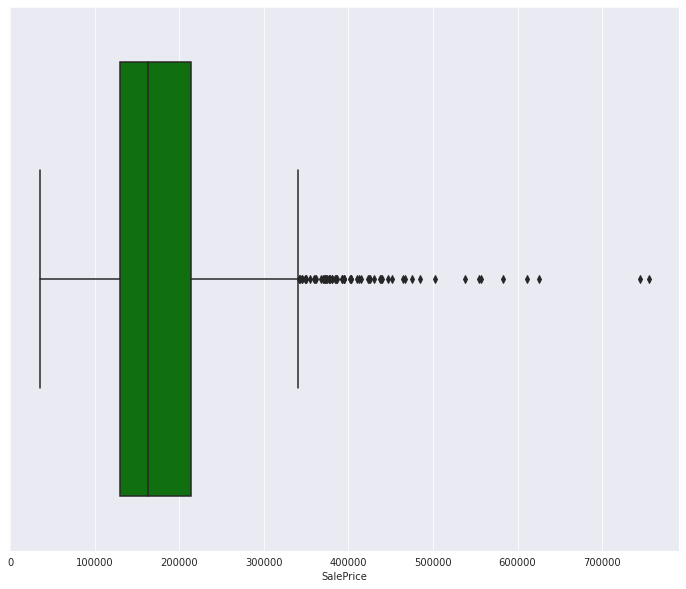

In [9]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x="SalePrice",color="green")

真ん中に山が来るようにする

In [10]:
# Skew and kurt for SalePrice 
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


log入れて右に

In [11]:
# Applying log transformation to remove skewness
df['SalePrice'] = np.log1p(df['SalePrice'])

もっかいグラフ

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

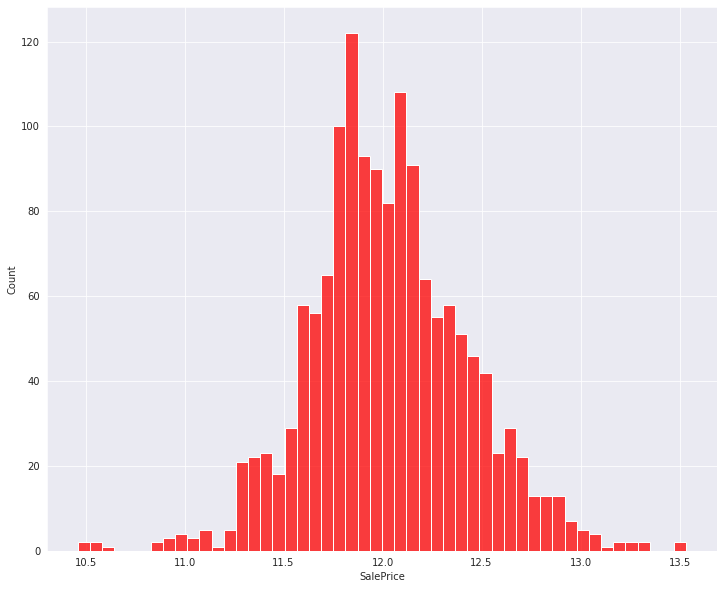

In [12]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data=df, x="SalePrice", bins=50,cbar=True,color="red")

<AxesSubplot:xlabel='SalePrice'>

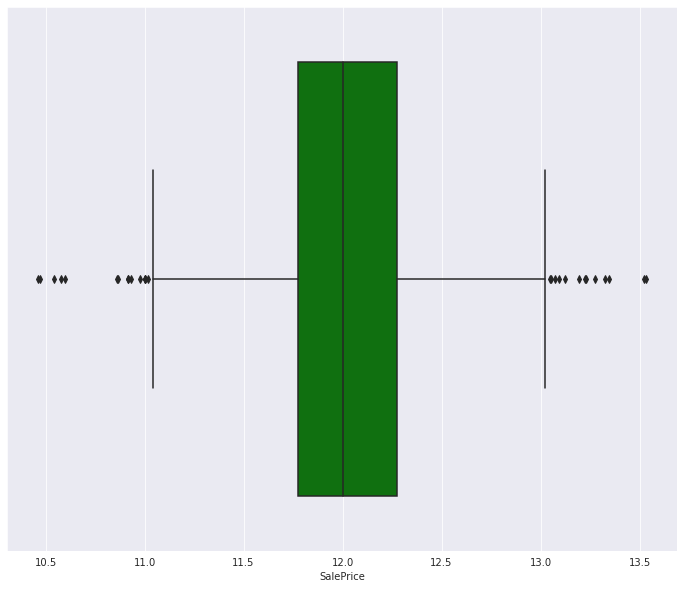

In [13]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x="SalePrice",color="green")

真ん中きた

In [14]:
df["SalePrice"].describe() 

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

meanとstdが高いらしい

In [15]:
df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

>corr():相関係数行列<br>
>ascending=False:値が大きい順

>

全体的に正の相関関係

<AxesSubplot:>

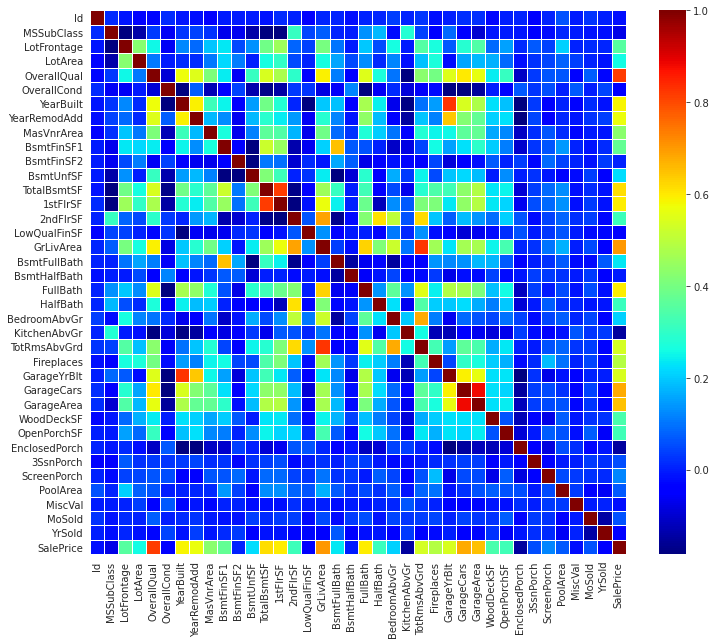

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap="jet",annot=False,linewidths=1,robust=True)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

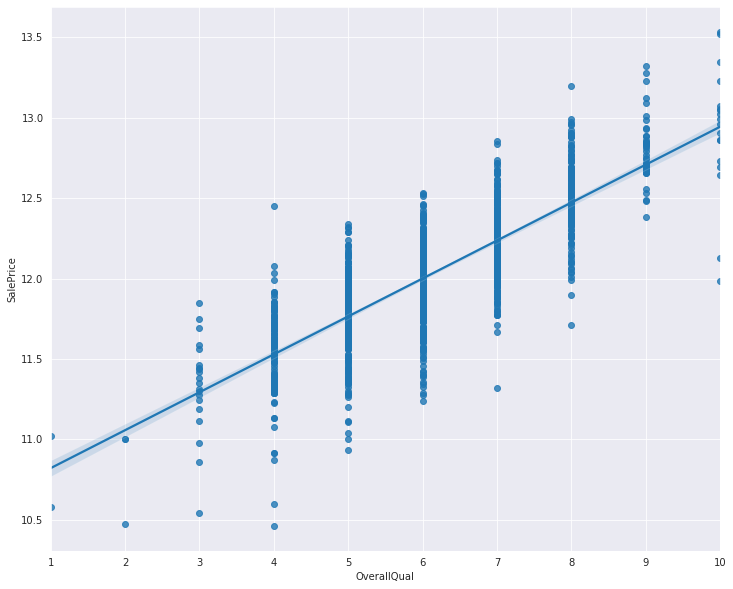

In [17]:
plt.figure(figsize=(12,10))
sns.regplot(x="OverallQual", y="SalePrice",data=df)

OverallQualは正の相関が高い

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

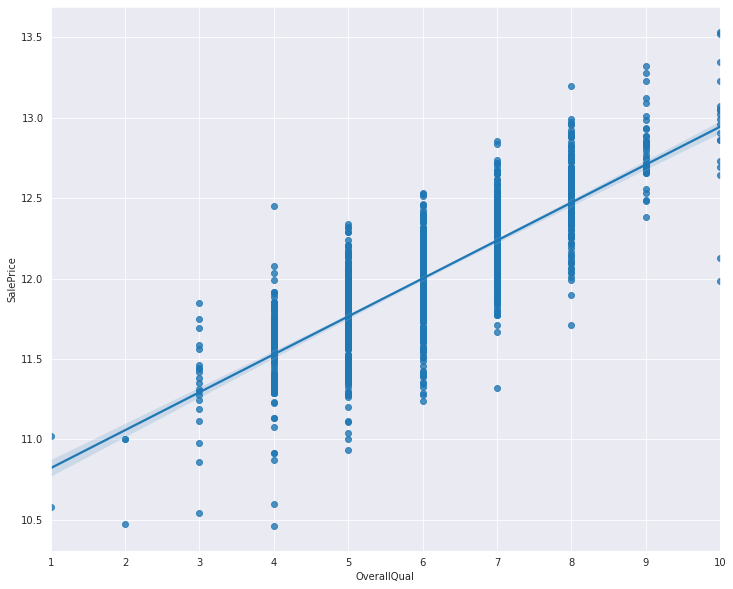

In [18]:
plt.figure(figsize=(12,10))
sns.regplot(x="OverallQual", y="SalePrice",data=df)

KitchenAbvGrは負の相関が高い

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

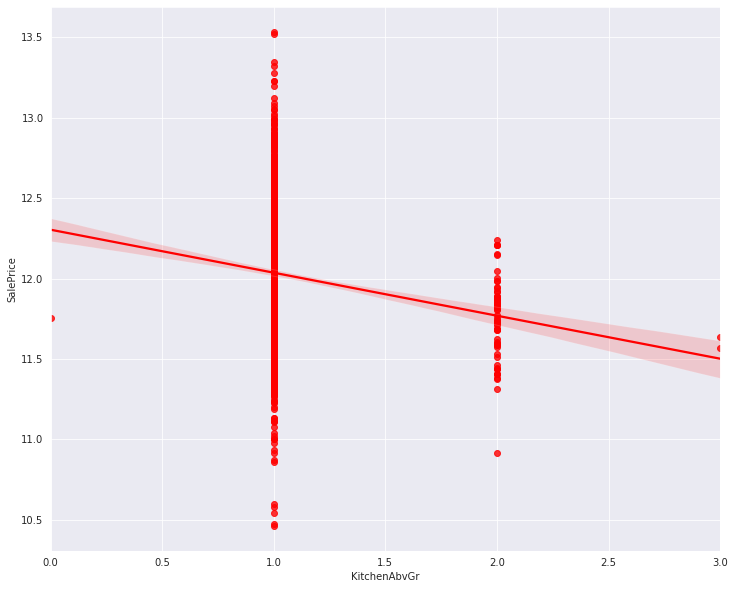

In [19]:
plt.figure(figsize=(12,10))
sns.regplot(x="KitchenAbvGr", y="SalePrice",data=df,color="red")

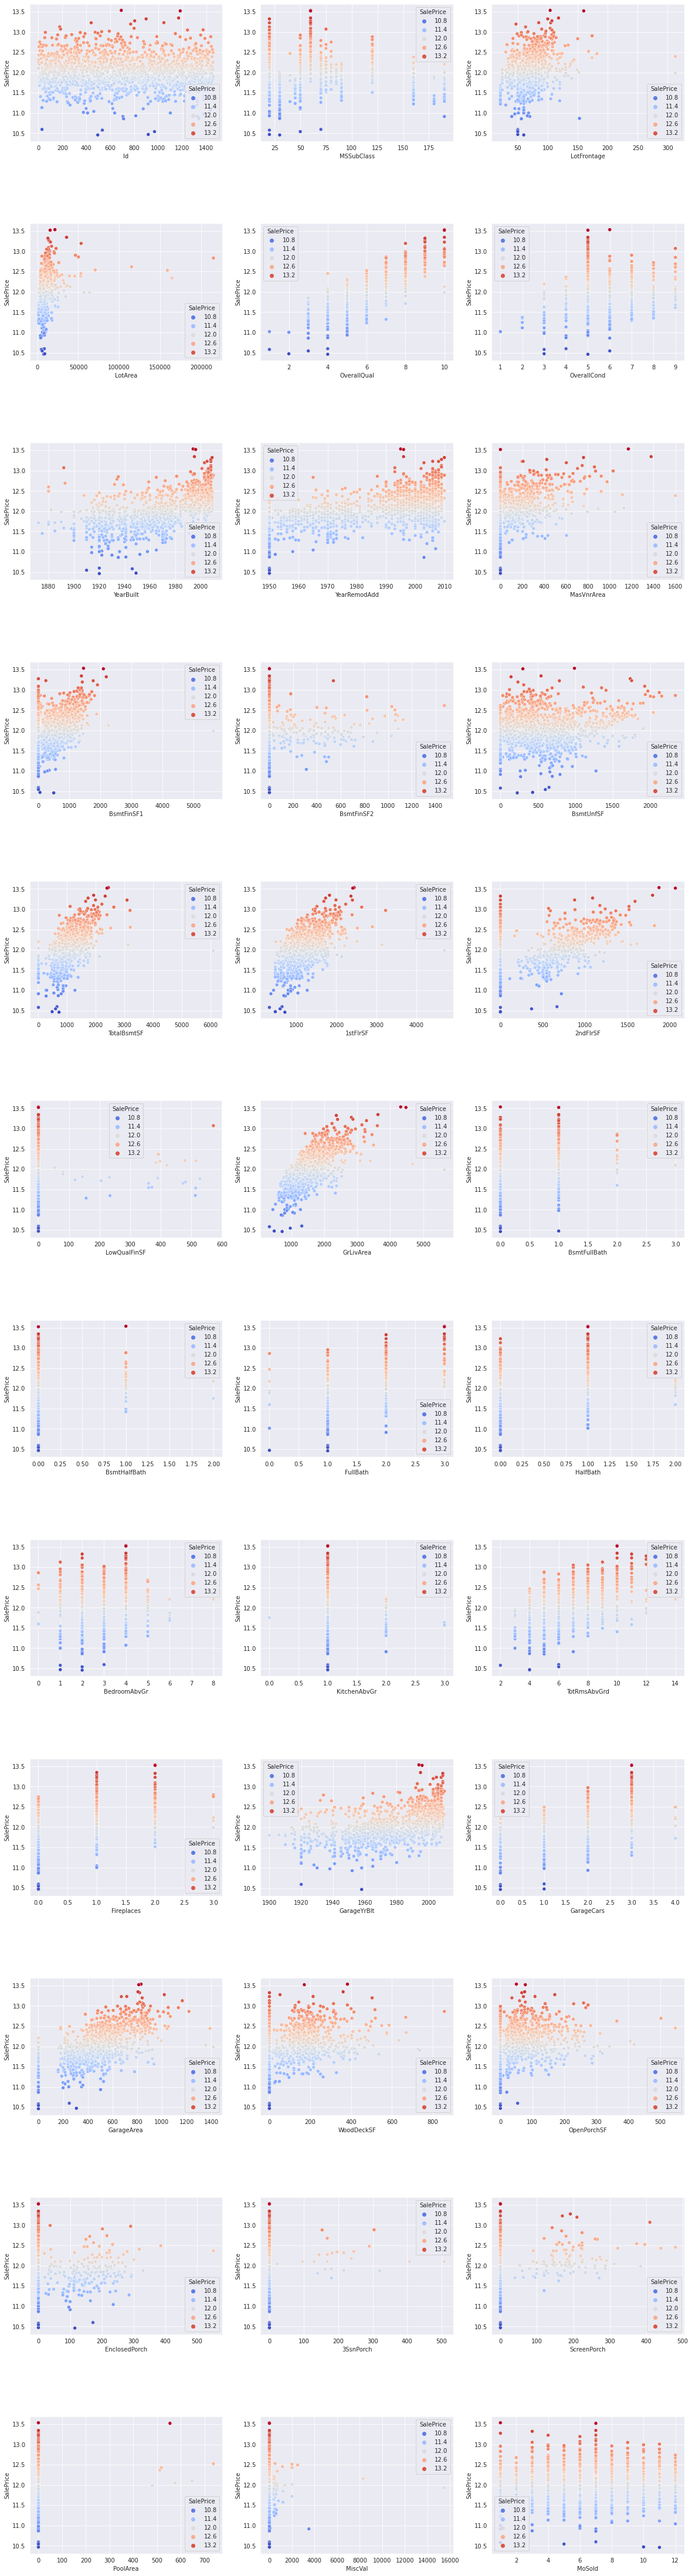

In [20]:
#Visualising numerical predictor variables with Target Variables
train_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
#adjust horizontal space between plots 
fig.subplots_adjust(hspace=0.6)
for i,ax in zip(train_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=train_num,ax=ax,palette='coolwarm')

>[figはfigre(図)、axesは(座標軸)](http://ailaby.com/matplotlib_fig/)で横3、縦12個のグラフ作る<br>
[hspaceで上下の余白調整（wspaceは左右（デフォルトは共に 0.2））](http://ailaby.com/subplots_adjust/)<br>
axsが[二次元配列](https://kosapi.com/post-5253/)やから[調整する](http://taustation.com/handle-axes-collecively/)。[参考](https://note.nkmk.me/python-numpy-ravel-flatten/)<br>
[zip関数](https://note.nkmk.me/python-zip-usage-for/)はforループの中で複数のイテラブルオブジェクトの要素を同時に取得したいときに使う。<br>
scatterplotは散布図<br>

>Predictor Variables = 説明変数,予測変数<br>
Target Variables = 目的変数,応答変数,従属変数

で数字じゃないやつもやる

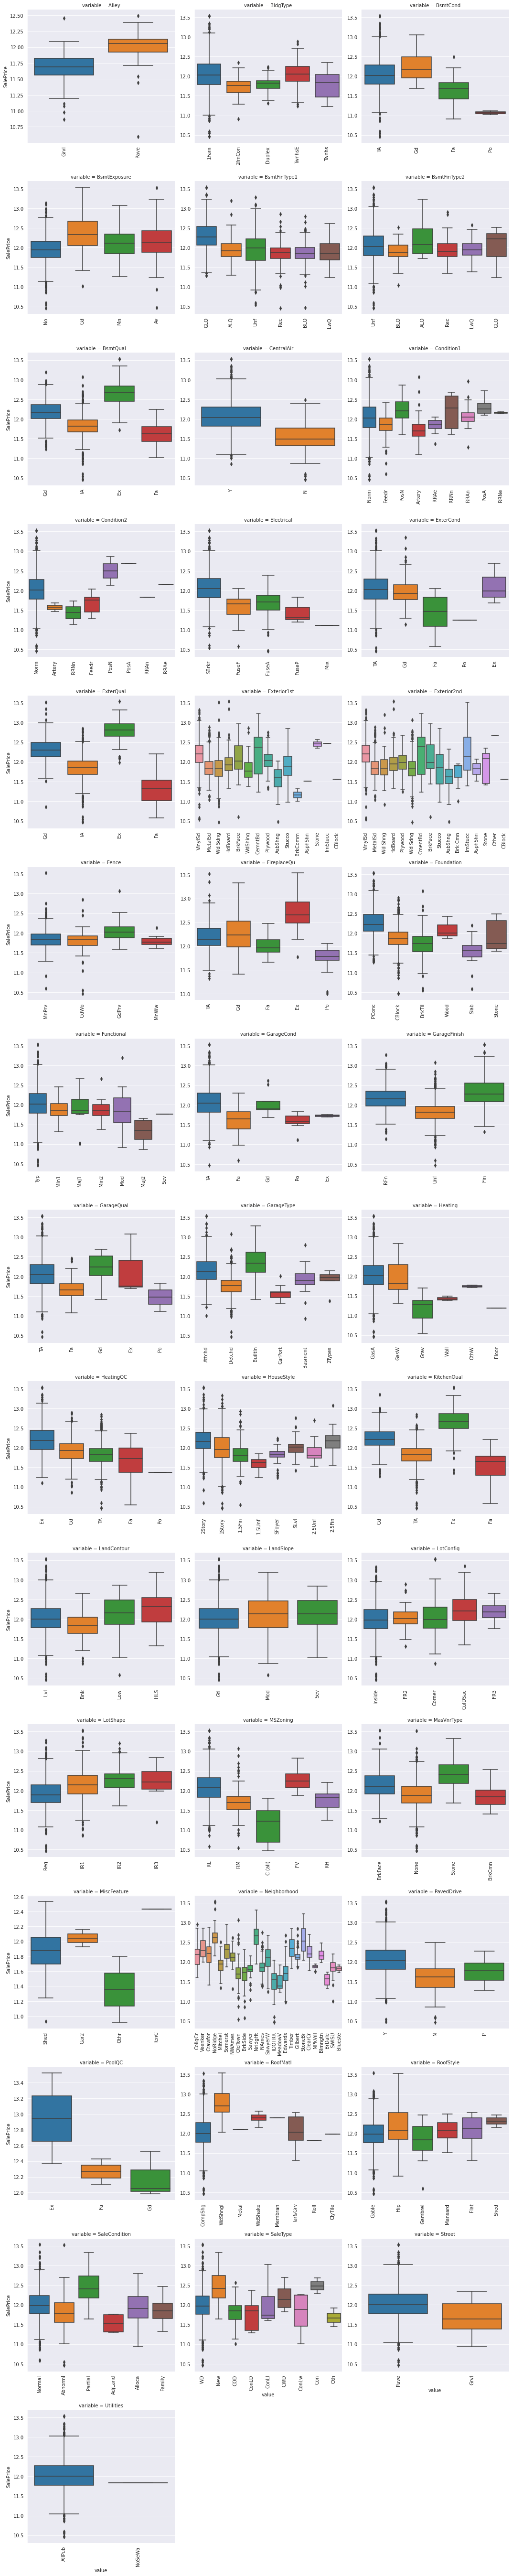

In [21]:
##Visualising Categorical predictor variables with Target Variables
categorical = df.select_dtypes(exclude=['int64','float64'])
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    

f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(facetgrid_boxplot,"value", "SalePrice")

>[**kwargsの参考](https://blog.pyq.jp/entry/Python_kaiketsu_200421)<br>
[xticks()](https://qiita.com/tomiyou/items/38fce051f8bd7246a0ce)でグラフの目盛り文字列を縦90に変更<br>
[melt関数](https://www.salesanalytics.co.jp/datascience/datascience021/)で縦長にする。[参考](https://ichi.pro/pandameruto-o-rikaisuru-pd-melt-59551147147557)<br>
FaceGridでグラフのグリッドを作る。そこにmap関数で[マッピング](https://qiita.com/kibinag0/items/87c5d4d08fdc3ad0e9b4)していく。

# 本編

In [22]:
num_cols=df.columns[df.dtypes!= "object"]
cat_cols=df.columns[df.dtypes== "object"]
test_num_cols=test.columns[test.dtypes!= "object"]
test_cat_cols=test.columns[test.dtypes== "object"]

カラムを数字とカテゴリーに分ける

In [23]:
df[num_cols].isnull().sum().sort_values(ascending=False)
#We have only 3 numerical columns with missing values

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
FullBath           0
MSSubClass         0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [24]:
test[test_num_cols].isnull().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [25]:
df[num_cols].isnull().sum().sort_values(ascending=False)/len(df)
#Their percentage is not so high and we can fill the missing values

LotFrontage      0.177397
GarageYrBlt      0.055479
MasVnrArea       0.005479
Id               0.000000
OpenPorchSF      0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
EnclosedPorch    0.000000
HalfBath         0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
BedroomAbvGr     0.000000
FullBath         0.000000
MSSubClass       0.000000
BsmtFinSF2       0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
BsmtFinSF1       0.000000
BsmtUnfSF        0.000000
BsmtHalfBath     0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
SalePrice        0.000000
dtype: float

### LotFrontage

In [26]:
df["LotFrontage"].value_counts() 
#There 110 different types

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [27]:
df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [28]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(),inplace=True) 
test["LotFrontage"].fillna(test["LotFrontage"].mean(),inplace=True)
df["LotFrontage"].isnull().sum()
# fill the missing values with the mean of the column

0

In [29]:
test["LotFrontage"].isnull().sum()

0

### GarageYrBlt

In [30]:
df["GarageYrBlt"]

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [31]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(),inplace=True)
test["GarageYrBlt"].fillna(test["GarageYrBlt"].median(),inplace=True)
print(df["GarageYrBlt"].isnull().sum())
print(test["GarageYrBlt"].isnull().sum())
# fill the missing values with the median of the column

0
0


In [32]:
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
test["MasVnrArea"].fillna(test["MasVnrArea"].median(), inplace=True)
# fill the missing values with the median of the column

In [33]:
df[num_cols].isnull().sum().sort_values(ascending=False)

Id               0
WoodDeckSF       0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
OpenPorchSF      0
MSSubClass       0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
SalePrice        0
dtype: int64

In [34]:
test[test_num_cols].isnull().sum().sort_values(ascending=False)
# still have some missing values, but so import

BsmtHalfBath     2
BsmtFullBath     2
BsmtFinSF1       1
GarageCars       1
GarageArea       1
TotalBsmtSF      1
BsmtUnfSF        1
BsmtFinSF2       1
OpenPorchSF      0
EnclosedPorch    0
BedroomAbvGr     0
3SsnPorch        0
ScreenPorch      0
WoodDeckSF       0
PoolArea         0
MiscVal          0
GarageYrBlt      0
MoSold           0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
Id               0
HalfBath         0
FullBath         0
MSSubClass       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
YrSold           0
dtype: int64

In [35]:
test["BsmtHalfBath"].fillna(test["BsmtHalfBath"].median(), inplace=True)
test["BsmtFullBath"].fillna(test["BsmtFullBath"].median(), inplace=True)
test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].mean(), inplace=True)
test["GarageCars"].fillna(test["GarageCars"].mean(), inplace=True)
test["GarageArea"].fillna(test["GarageArea"].mean(), inplace=True)
test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mean(), inplace=True)
test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].mean(), inplace=True)
test["BsmtFinSF2"].fillna(test["BsmtFinSF2"].mean(), inplace=True)
test[test_num_cols].isnull().sum().sort_values(ascending=False) 
#We have dealt with the missing values in all numerical columns in the test set

Id               0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
HalfBath         0
BsmtHalfBath     0
MSSubClass       0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
YrSold           0
dtype: int64

In [36]:
df[cat_cols].isnull().sum().sort_values(ascending=False)/len(df[cat_cols])
#We have 16 categorical columns with missing values

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
GarageType       0.055479
GarageCond       0.055479
GarageQual       0.055479
GarageFinish     0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtQual         0.025342
BsmtCond         0.025342
MasVnrType       0.005479
Electrical       0.000685
Functional       0.000000
KitchenQual      0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
PavedDrive       0.000000
SaleType         0.000000
MSZoning         0.000000
Street           0.000000
Condition2       0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
BldgType         0.000000
Foundation       0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st 

In [37]:
test[test_cat_cols].isnull().sum().sort_values(ascending=False)/len(test[test_cat_cols])

PoolQC           0.997944
MiscFeature      0.965045
Alley            0.926662
Fence            0.801234
FireplaceQu      0.500343
GarageCond       0.053461
GarageQual       0.053461
GarageFinish     0.053461
GarageType       0.052090
BsmtCond         0.030843
BsmtQual         0.030158
BsmtExposure     0.030158
BsmtFinType2     0.028787
BsmtFinType1     0.028787
MasVnrType       0.010966
MSZoning         0.002742
Utilities        0.001371
Functional       0.001371
Exterior2nd      0.000685
KitchenQual      0.000685
SaleType         0.000685
Exterior1st      0.000685
LotShape         0.000000
LandContour      0.000000
PavedDrive       0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Street      

In [38]:
# drop columns which have more than %80 missing values:
df.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1, inplace=True)
df.isnull().sum().sort_values(ascending=False)

FireplaceQu     690
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
               ... 
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
SalePrice         0
Length: 77, dtype: int64

In [39]:
test.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1, inplace=True)
test.isnull().sum().sort_values(ascending=False)

FireplaceQu      730
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
                ... 
TotalBsmtSF        0
MSSubClass         0
HeatingQC          0
CentralAir         0
SaleCondition      0
Length: 76, dtype: int64

In [40]:
#FireplaceQu  has % over %40 missing value, but it has a couple of categories that we can fill
df["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [41]:
df["FireplaceQu"].fillna("Gd",inplace=True)
df["FireplaceQu"].isnull().sum()

0

In [42]:
df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [43]:
df["GarageType"].fillna("Attchd",inplace=True) 
test["GarageType"].fillna("Attchd",inplace=True)
#fill the missing values with the most common value

In [44]:
df["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [45]:
df["GarageFinish"].fillna("Unf",inplace=True)
test["GarageFinish"].fillna("Unf",inplace=True)

In [46]:
df["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [47]:
df["GarageCond"].fillna("TA",inplace=True)
test["GarageCond"].fillna("TA",inplace=True)

In [48]:
df["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [49]:
df["GarageQual"].fillna("TA",inplace=True)
test["GarageQual"].fillna("TA",inplace=True)

In [50]:
df.isnull().sum().sort_values(ascending=False)

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
                ..
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
MSSubClass       0
SalePrice        0
Length: 77, dtype: int64

In [51]:
df["BsmtFinType2"].fillna("Unf",inplace=True)
df["BsmtExposure"].fillna("No",inplace=True)
df["BsmtFinType1"].fillna("Unf",inplace=True)
df["BsmtQual"].fillna("TA",inplace=True)
df["BsmtCond"].fillna("TA",inplace=True)
df["MasVnrType"].fillna("None",inplace=True)
df["Electrical"].fillna("SBrkr",inplace=True)
#drop raws with missing values

In [52]:
df.isnull().sum().sort_values(ascending=False)

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 77, dtype: int64

In [53]:
test.isnull().sum().sort_values(ascending=False)

FireplaceQu      730
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType2      42
                ... 
TotalBsmtSF        0
MSSubClass         0
HeatingQC          0
CentralAir         0
SaleCondition      0
Length: 76, dtype: int64

In [54]:
test["BsmtCond"].fillna("TA",inplace=True)
test["BsmtQual"].fillna("TA",inplace=True)
test["BsmtExposure"].fillna("No",inplace=True)
test["BsmtFinType2"].fillna("Unf",inplace=True)
test["BsmtFinType1"].fillna("GLQ",inplace=True)
test.isnull().sum().sort_values(ascending=False)

FireplaceQu      730
MasVnrType        16
MSZoning           4
Functional         2
Utilities          2
                ... 
Foundation         0
ExterCond          0
ExterQual          0
MasVnrArea         0
SaleCondition      0
Length: 76, dtype: int64

In [55]:
test["MasVnrType"].fillna("None",inplace=True)
test["MSZoning"].fillna("RL",inplace=True)
test["Functional"].fillna("No",inplace=True)
test["Utilities"].fillna("AllPub",inplace=True)
test["Exterior2nd"].fillna("VinylSd",inplace=True)
test.isnull().sum().sort_values(ascending=False)

FireplaceQu      730
SaleType           1
Exterior1st        1
KitchenQual        1
Id                 0
                ... 
MasVnrArea         0
MasVnrType         0
Exterior2nd        0
RoofMatl           0
SaleCondition      0
Length: 76, dtype: int64

In [56]:
test["KitchenQual"].fillna("TA",inplace=True)
test["Exterior1st"].fillna("VinylSd",inplace=True)
test["SaleType"].fillna("WD",inplace=True)
test.isnull().sum().sort_values(ascending=False)

FireplaceQu      730
FullBath           0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
                ... 
MasVnrType         0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
SaleCondition      0
Length: 76, dtype: int64

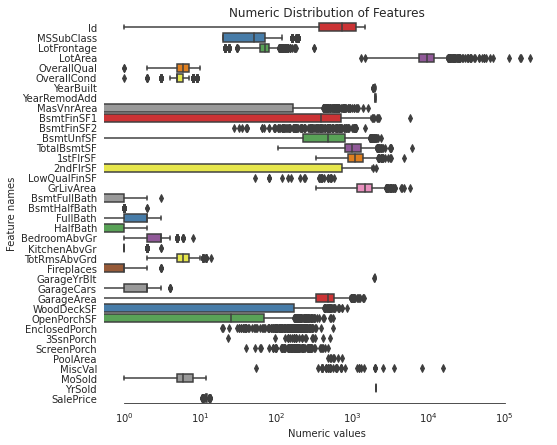

In [57]:
# Creating box plots for all numeric columns:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[num_cols] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

[matplotlib参考](http://bicycle1885.hatenablog.com/entry/2014/02/14/023734)<br>[参考2](https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9)

In [58]:
# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [59]:
# Finding skewed numerical columns:
skew_columns = df[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

In [60]:
high_skew = skew_columns[skew_columns > 0.5]
skew_index = high_skew.index

In [61]:
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_columns

There are 26 numerical features with Skew > 0.5 :


MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
SalePrice         0.121222
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
G

In [62]:
for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


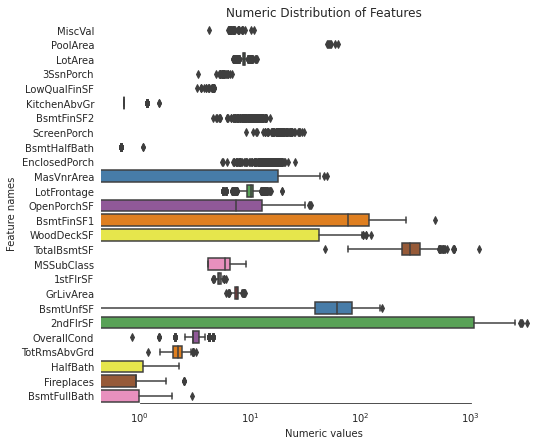

In [63]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

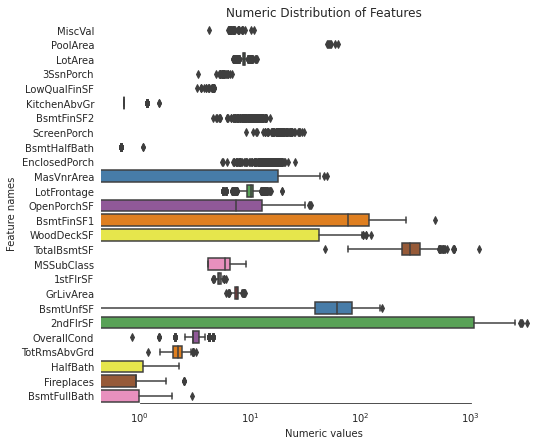

In [64]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

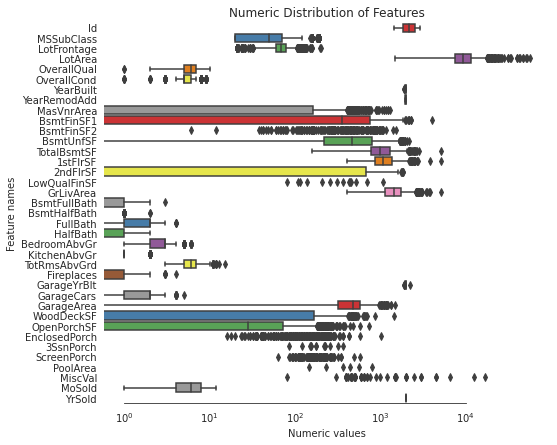

In [65]:
#Lets do the same operations to the test data:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=test[test_num_cols] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [66]:
# Finding skewed numerical columns:
skew_columns = test[test_num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_columns[skew_columns > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_columns

There are 25 numerical features with Skew > 0.5 :


PoolArea         20.176117
MiscVal          20.054543
LowQualFinSF     16.150628
3SsnPorch        12.511336
EnclosedPorch     4.664371
KitchenAbvGr      4.074860
BsmtFinSF2        4.038570
ScreenPorch       3.784349
BsmtHalfBath      3.779085
LotArea           3.112013
OpenPorchSF       2.685015
MasVnrArea        2.546947
WoodDeckSF        2.128569
1stFlrSF          1.556592
MSSubClass        1.345305
BsmtFinSF1        1.164876
GrLivArea         1.129240
BsmtUnfSF         0.919285
2ndFlrSF          0.911944
TotRmsAbvGrd      0.841731
Fireplaces        0.819015
TotalBsmtSF       0.813031
LotFrontage       0.719448
HalfBath          0.713993
BsmtFullBath      0.651195
OverallCond       0.448703
BedroomAbvGr      0.436174
GarageArea        0.300033
FullBath          0.295534
MoSold            0.182834
OverallQual       0.181010
YrSold            0.168813
Id                0.000000
GarageCars       -0.107068
GarageYrBlt      -0.170538
YearRemodAdd     -0.399495
YearBuilt        -0.587052
d

In [67]:
# Lets normalize skewed features
for i in skew_index:
    test[i] = boxcox1p(test[i], boxcox_normmax(test[i] + 1))

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


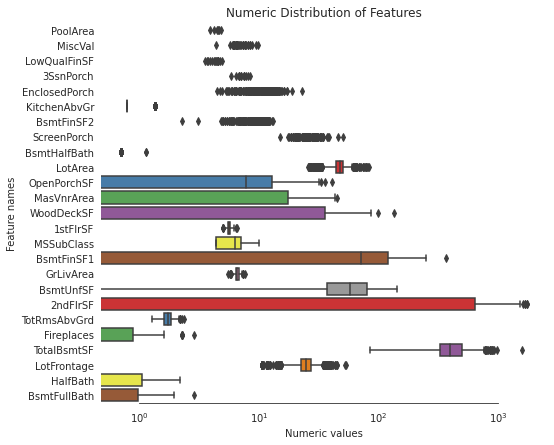

In [68]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=test[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [69]:
df["SalePrice"]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [70]:
cat_cols=df.columns[df.dtypes== "object"]
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [71]:
test_cat_cols = test.columns[test.dtypes=="object"]
test_cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [72]:
df[cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [73]:
df= pd.get_dummies(df,columns =["MSZoning","Street","LotShape","LandContour",'LandSlope', 
                                'LotConfig','Neighborhood', 'Condition1', 'BldgType', 
                                'RoofStyle',  'MasVnrType', 'ExterQual', 
                                'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                'BsmtFinType1', 'HeatingQC', 'CentralAir', 
                                'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first =True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Utilities,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,6.281283,9.826839,8.670456,AllPub,Norm,2Story,7,3.036931,2003,...,0,0,0,0,1,0,0,0,1,0
1,2,4.146687,10.795703,8.787629,AllPub,Norm,1Story,6,4.241668,1976,...,0,0,0,0,1,0,0,0,1,0
2,3,6.281283,10.031076,8.933083,AllPub,Norm,2Story,7,3.036931,2001,...,0,0,0,0,1,0,0,0,1,0
3,4,6.622580,9.472852,8.782836,AllPub,Norm,2Story,7,3.036931,1915,...,0,0,0,0,1,0,0,0,0,0
4,5,6.281283,11.034378,9.150118,AllPub,Norm,2Story,8,3.036931,2000,...,0,0,0,0,1,0,0,0,1,0


In [74]:
df.drop(["Exterior2nd","Condition2","BsmtFinType2","Utilities", 'HouseStyle',
         'RoofMatl', 'Exterior1st',  'Heating', 'Electrical', 'Functional', 
        'GarageQual'],axis=1,inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 163 entries, Id to SaleCondition_Partial
dtypes: float64(28), int64(10), uint8(125)
memory usage: 611.8 KB


In [76]:
test[test_cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal


In [77]:
test= pd.get_dummies(test,columns =["MSZoning","Street","LotShape","LandContour",'LandSlope', 
                                    'LotConfig','Neighborhood', 'Condition1', 'BldgType', 
                                    'RoofStyle',  'MasVnrType', 'ExterQual', 
                                    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                    'BsmtFinType1', 'HeatingQC', 'CentralAir', 
                                    'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                    'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first =True)
test.head()

,Id,MSSubClass,LotFrontage,LotArea,Utilities,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,4.346649,27.830492,50.728192,AllPub,Norm,1Story,5,6,1961,...,0,0,0,0,1,0,0,0,1,0
1,1462,4.346649,28.076422,54.118575,AllPub,Norm,1Story,6,6,1958,...,0,0,0,0,1,0,0,0,1,0
2,1463,6.707526,26.333969,53.590846,AllPub,Norm,2Story,5,5,1997,...,0,0,0,0,1,0,0,0,1,0
3,1464,6.707526,27.335706,48.336767,AllPub,Norm,2Story,6,6,1998,...,0,0,0,0,1,0,0,0,1,0
4,1465,8.545975,17.864759,38.773077,AllPub,Norm,1Story,8,5,1992,...,0,0,0,0,1,0,0,0,1,0


In [78]:
test.drop(["Exterior2nd","Condition2","BsmtFinType2","Utilities", 
           'HouseStyle', 'RoofMatl', 'Exterior1st',  'Heating', 
           'Electrical', 'Functional', 'GarageQual'],axis=1,inplace=True) 
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,4.346649,27.830492,50.728192,5,6,1961,1961,0.000000,87.054268,...,0,0,0,0,1,0,0,0,1,0
1,1462,4.346649,28.076422,54.118575,6,6,1958,1958,14.470534,137.226179,...,0,0,0,0,1,0,0,0,1,0
2,1463,6.707526,26.333969,53.590846,5,5,1997,1998,0.000000,123.768689,...,0,0,0,0,1,0,0,0,1,0
3,1464,6.707526,27.335706,48.336767,6,6,1998,1998,6.113887,103.082889,...,0,0,0,0,1,0,0,0,1,0
4,1465,8.545975,17.864759,38.773077,8,5,1992,1992,0.000000,59.033341,...,0,0,0,0,1,0,0,0,1,0


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 162 entries, Id to SaleCondition_Partial
dtypes: float64(28), int64(9), uint8(125)
memory usage: 600.0 KB


In [80]:
df.drop("Id",axis=1,inplace=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.281283,9.826839,8.670456,7,3.036931,2003,2003,19.340338,118.098021,0.0,...,0,0,0,0,1,0,0,0,1,0
1,4.146687,10.795703,8.787629,6,4.241668,1976,1976,0.000000,147.125769,0.0,...,0,0,0,0,1,0,0,0,1,0
2,6.281283,10.031076,8.933083,7,3.036931,2001,2002,17.687636,91.750453,0.0,...,0,0,0,0,1,0,0,0,1,0
3,6.622580,9.472852,8.782836,7,3.036931,1915,1970,0.000000,52.861358,0.0,...,0,0,0,0,1,0,0,0,0,0
4,6.281283,11.034378,9.150118,8,3.036931,2000,2000,25.266438,112.267329,0.0,...,0,0,0,0,1,0,0,0,1,0


In [81]:
test_id = test["Id"]
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [82]:
test.drop("Id",axis=1,inplace=True)
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.346649,27.830492,50.728192,5,6,1961,1961,0.000000,87.054268,7.328389,...,0,0,0,0,1,0,0,0,1,0
1,4.346649,28.076422,54.118575,6,6,1958,1958,14.470534,137.226179,0.000000,...,0,0,0,0,1,0,0,0,1,0
2,6.707526,26.333969,53.590846,5,5,1997,1998,0.000000,123.768689,0.000000,...,0,0,0,0,1,0,0,0,1,0
3,6.707526,27.335706,48.336767,6,6,1998,1998,6.113887,103.082889,0.000000,...,0,0,0,0,1,0,0,0,1,0
4,8.545975,17.864759,38.773077,8,5,1992,1992,0.000000,59.033341,0.000000,...,0,0,0,0,1,0,0,0,1,0


# モデル

In [83]:
X=df.drop("SalePrice",axis=1)
X = X.values
X.shape

(1460, 161)

In [84]:
y.shape

(1460,)

In [85]:
test= test.values
test.shape

(1459, 161)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.05,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1387, 161)
(73, 161)
(1387,)
(73,)


**LinearRegression**

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions1 = model.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_test,predictions1))
print(mean_squared_error(y_test,predictions1))
print(np.sqrt(mean_squared_error(y_test,predictions1)))

15703.051291169468
499972487.20153505
22360.06456165847


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

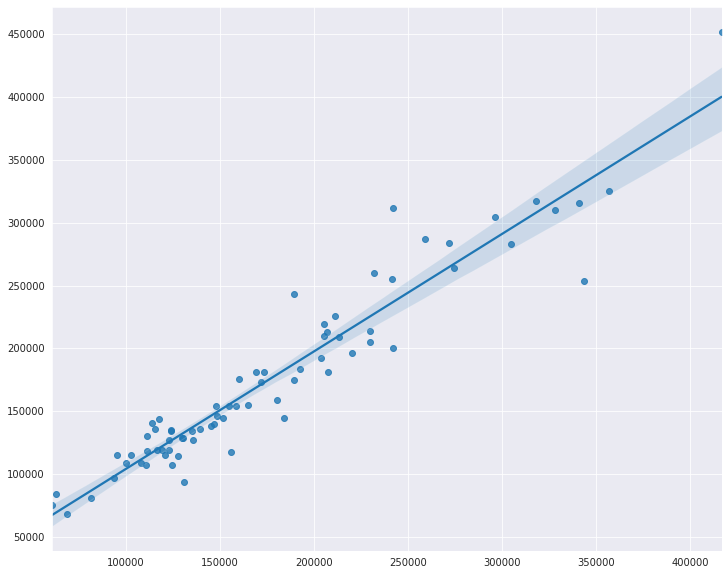

In [89]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.regplot(predictions1,y_test)

**DecisionTreeRegressor**

In [90]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
predictions2 = dtree.predict(X_test)
print(mean_absolute_error(y_test,predictions2))
print(mean_squared_error(y_test,predictions2))
print(np.sqrt(mean_squared_error(y_test,predictions2))) 

23210.616438356163
1448170172.9178083
38054.83113768616


In [91]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 67.99 %
Standard Deviation: 17.02 %


**RandomForestRegressor**

In [92]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
predictions_rforest= random_forest.predict(X_test)
print(mean_absolute_error(y_test,predictions_rforest))
print(mean_squared_error(y_test,predictions_rforest))
print(np.sqrt(mean_squared_error(y_test,predictions_rforest)))

14190.196575342468
642433858.7924452
25346.278993028645


In [93]:
accuracies = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.90 %
Standard Deviation: 7.54 %


**GridSearchCV**

In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [ 100,120,150], 'max_features': [ 12,14,16]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(-best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 85864927815.67 %
Best Parameters: {'max_features': 14, 'n_estimators': 100}


In [95]:
grid_predictions = grid_search.predict(X_test)
print(mean_absolute_error(y_test,grid_predictions))
print(mean_squared_error(y_test,grid_predictions))
print(np.sqrt(mean_squared_error(y_test,grid_predictions))) #The predictions is very close to Random Forest

14321.925342465755
600198733.5146563
24498.953722856335


**LightGradientBoostingRegressor**

In [96]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,cross_val_score

In [97]:
kfold= KFold(n_splits=11,random_state=42,shuffle=True)

In [98]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [99]:
lightgbm.fit(X_train,y_train)
lightgbm_predictions = lightgbm.predict(X_test)
print(mean_absolute_error(y_test,lightgbm_predictions))
print(mean_squared_error(y_test,lightgbm_predictions))
print(np.sqrt(mean_squared_error(y_test,lightgbm_predictions))) 

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
15806.979393597552
578101369.0109527
24043.73866541875


**RobustScaler**

In [100]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [101]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.00015))

In [102]:
svr.fit(X_train,y_train)
svr_predictions= svr.predict(X_test)
print(mean_absolute_error(y_test,svr_predictions))
print(mean_squared_error(y_test,svr_predictions))
print(np.sqrt(mean_squared_error(y_test,svr_predictions)))

57509.60840865362
5647874066.631452
75152.33906294235


**XGBoost**

In [103]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [104]:
xgboost.fit(X_train, y_train)
xgboost_predictions =xgboost.predict(X_test)

In [105]:
print(mean_absolute_error(y_test,xgboost_predictions))
print(mean_squared_error(y_test,xgboost_predictions))
print(np.sqrt(mean_squared_error(y_test,xgboost_predictions)))

12872.809931506848
467917658.0568814
21631.404440231832


**GradientBoostingRegressor**

In [106]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42) 

In [ ]:
gbr.fit(X_train,y_train)
gbr_predictions = gbr.predict(X_test)
print(mean_absolute_error(y_test,gbr_predictions))
print(mean_squared_error(y_test,gbr_predictions))
print(np.sqrt(mean_squared_error(y_test,gbr_predictions))) 

**ElasticNetCV**

In [ ]:
alpha_elnet= [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
l1ratio_elnet = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1000000, alphas=alpha_elnet, \
                                                        cv=kfold, l1_ratio=l1ratio_elnet))

In [ ]:
elasticnet.fit(X_train,y_train)
elastic_predictions = elasticnet.predict(X_test)
print(mean_absolute_error(y_test,elastic_predictions))
print(mean_squared_error(y_test,elastic_predictions))
print(np.sqrt(mean_squared_error(y_test,elastic_predictions)))

**LassoCV**

In [ ]:
alphas_lasso = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=alphas_lasso, cv=kfold))

In [ ]:
lasso.fit(X_train,y_train)
lasso_predictions = lasso.predict(X_test)
print(mean_absolute_error(y_test,lasso_predictions))
print(mean_squared_error(y_test,lasso_predictions))
print(np.sqrt(mean_squared_error(y_test,lasso_predictions)))

**StackingCVRegressor**

In [ ]:
stack_reg = StackingCVRegressor(regressors=(xgboost, lightgbm, random_forest,
                                            gbr,svr,lasso,elasticnet),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)
stack_reg.fit(X_train,y_train)
stack_predictions = stack_reg.predict(X_test)
print(mean_absolute_error(y_test,stack_predictions))
print(mean_squared_error(y_test,stack_predictions))
print(np.sqrt(mean_squared_error(y_test,stack_predictions))) 

**blend models**

In [ ]:
blend_predictions=(0.025* elasticnet.predict(X_test)) + \
            (0.025 * lasso.predict(X_test)) + \
            (0.025 * random_forest.predict(X_test)) + \
            (0.025* svr.predict(X_test)) + \
            (0.62 * gbr.predict(X_test)) + \
            (0.03 * xgboost.predict(X_test)) + \
            (0.03 * lightgbm.predict(X_test)) + \
            (0.22 * stack_reg.predict(np.array(X_test))) 

In [ ]:
print(mean_absolute_error(y_test,blend_predictions))
print(mean_squared_error(y_test,blend_predictions))
print(np.sqrt(mean_squared_error(y_test,blend_predictions))) 

**ANNs**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
rs=RobustScaler()

In [ ]:
X_deep_train=rs.fit_transform(X_train)
X_deep_train

In [ ]:
X_deep_test =rs.transform(X_test)
X_deep_test

In [ ]:
model = Sequential()
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer="adam")
model.fit(np.array(X_train), np.array(y_train), epochs=100, batch_size=10)

In [ ]:
deep_predictions=model.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test,deep_predictions))
print(mean_squared_error(y_test,deep_predictions))
print(np.sqrt(mean_squared_error(y_test,deep_predictions)))

In [ ]:
submission_sample = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission_sample.shape

In [ ]:
pd.DataFrame(X_train)

In [ ]:
def latest_predictions(features): 
    return ((0.025* elasticnet.predict(features)) + \
            (0.025 * lasso.predict(features)) + \
            (0.025 * random_forest.predict(features)) + \
            (0.025* svr.predict(features)) + \
            (0.62 * gbr.predict(features)) + \
            (0.03 * xgboost.predict(features)) + \
            (0.03 * lightgbm.predict(features)) + \
            (0.22 * stack_reg.predict(np.array(features))))

In [ ]:
submission_sample.iloc[:,1] = latest_predictions(test)
submission_sample

In [ ]:
q1 = submission_sample['SalePrice'].quantile(0.005)
q2 = submission_sample['SalePrice'].quantile(0.995)
submission_sample['SalePrice'] = submission_sample['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission_sample['SalePrice'] = submission_sample['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

In [ ]:
submission_sample.to_csv("new_submission_regression4.csv", index=False)